In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sales = pd.read_csv('home_data.csv')

In [3]:
def func(x):
    x = x+5
    return x


In [4]:
#apply function in case of turicreate
sales['bedrooms'].apply(func)    

0        8
1        8
2        7
3        9
4        8
        ..
21608    8
21609    9
21610    7
21611    8
21612    7
Name: bedrooms, Length: 21613, dtype: int64

In [5]:
sales = pd.DataFrame(sales)

In [6]:
#apply function in case of dataframe pandas
sales['bedrooms'].apply(func)

0        8
1        8
2        7
3        9
4        8
        ..
21608    8
21609    9
21610    7
21611    8
21612    7
Name: bedrooms, Length: 21613, dtype: int64

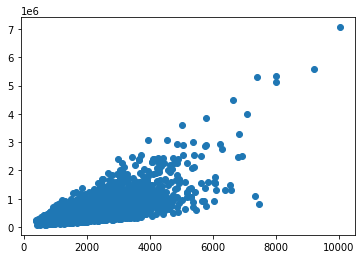

In [7]:
plt.scatter(sales[1:5000]['sqft_living'],sales[1:5000]['price'])


# Splitting the data

In [8]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(sales[['sqft_living']],sales['price'],random_state = 0)

# Creating the model

In [9]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(x_train,y_train)
y_pred = linreg.predict(x_test)
linreg.score(x_test,y_test)

0.4830157733869872

In [10]:
m = linreg.coef_
m

array([280.28160515])

In [11]:
c = linreg.intercept_
c

-41565.74178884528

In [12]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred, squared = False)     
#for RMSE, we use squared = False criterion. If True, this will be MSE and not RMSE

262061.9900377967

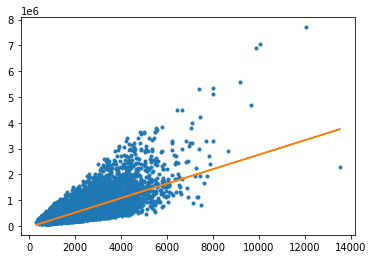

In [13]:
x = sales['sqft_living']
plt.plot(x,sales['price'],'.', x ,m*x+c,'-')

# Using other features from original data

In [14]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [15]:
x_train , x_test , y_train , y_test = train_test_split(sales[features], sales['price'],random_state = 0)

In [16]:
linreg = LinearRegression().fit(x_train,y_train)
y_pred = linreg.predict(x_test)

In [17]:
mean_squared_error(y_test,y_pred,squared = False)

256239.9631260589

In [18]:
linreg.score(x_test,y_test)

0.5057314813964184

# Example of first house

In [19]:
house1 = sales[sales['id']=='5309101200']

/home/dhruvg334/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [20]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


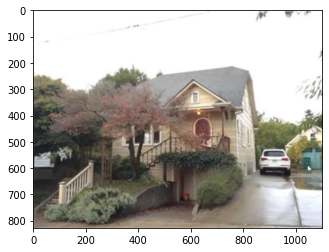

In [21]:
import matplotlib.image as mpimg        
#to check image, we use the library as above

img = mpimg.imread('house_images/house1.png')
plt.imshow(img)

<img src = 'house_images/house1.png'>

Click on the image above to get the code to look at images.

This is written on markdown. So need to click to see what is the code.

<BarContainer object of 24 artists>

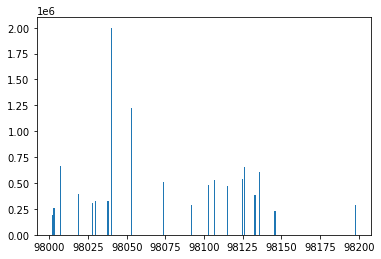

In [22]:
plt.bar(sales[1:25]['zipcode'],sales[1:25]['price']) 
#this is how we make a bar graph

In [23]:
sales['price'].max()
#we can also do this in dataframe

7700000

In [24]:
sales[sales['price']==7700000]
#we can use this to get the data of specific value of particular criteria

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [25]:
#or we can use this method. The problem with this method is that we need to create other variable

s = sales.where(sales['price'] == 7700000)
s.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6.762700e+09,20141013T000000,7700000.0,6.0,8.0,12050.0,27600.0,2.5,0.0,3.0,...,13.0,8570.0,3480.0,1910.0,1987.0,98102.0,47.6298,-122.323,3940.0,8800.0


# Example of second house

In [26]:
house2 = sales[sales['id']=='1925069082']
house2

/home/dhruvg334/.local/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


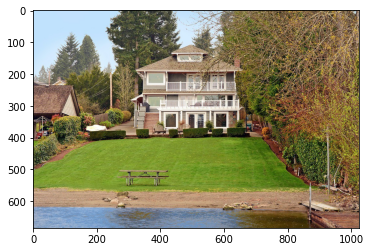

In [27]:
import matplotlib.image as mpimg        

img2 = mpimg.imread('house_images/house2.jpg')
plt.imshow(img2)

<img src = 'house_images/house2.jpg'>

# Bill Gates house

In [28]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

blg = pd.DataFrame(bill_gates)

In [29]:
print(f'Predicted house price of Bill Gates based on his house data: ${linreg.predict(blg[features])[0]}')

Predicted house price of Bill Gates based on his house data: $15590639.97467839


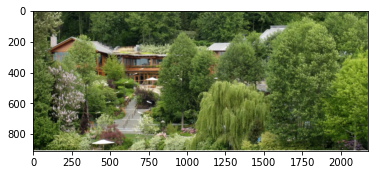

In [30]:
import matplotlib.image as mpimg

img3 = mpimg.imread('house_images/bill_gates.png')
plt.imshow(img3)

<img src = 'house_images/bill_gates.png'>


In [31]:
mean_squared_error(y_test,y_pred)

65658918702.84402